## Pohon Keputusan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import cv2 as cv

In [12]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [3]:
dataset = "https://raw.githubusercontent.com/cindylmr19/dataset/main/iris.csv"
data = pd.read_csv(dataset)

Menampilkan 5 data pertama pada dataset

In [10]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

Memberikan informasi mengenai jumlah data dan jumlah kolom karakter pada dataset

In [7]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Menampilkan 5 data akhir pada dataset

In [9]:
data.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Menampilkan jumlah data class pada dataset 

In [16]:
data["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Merubah data class kedalam bentuk numerik

In [17]:
data=data.replace(to_replace='Iris-setosa',value=0)
data=data.replace(to_replace='Iris-versicolor',value=1)
data=data.replace(to_replace='Iris-virginica',value=2)

In [18]:
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
data['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Data X digunakan untuk menyimpan data kolom karakter kedua sampai keempat (hanya berisi 3 kolom karakter)

In [21]:
X=data.iloc[:,1:-1]
X.head()

,sepalwidth,petallength,petalwidth
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


Data Y merupakan data yang hanya berisi class

In [22]:
Y=data.iloc[:,-1:]
Y.head()

,class
0,0
1,0
2,0
3,0
4,0


Ukuran test_size=0.2

In [23]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
iniindex=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,random_state=100)

In [33]:
iniindex.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [34]:
y_pred=iniindex.predict(X_test)

In [35]:
confusion_matrix(Y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [36]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Entropy

$$
\operatorname{Entropy}(S)=\sum_{i=1}^n-p i * \log _2 p i
$$

In [49]:
entropy_deci=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=100)

In [50]:
entropy_deci.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [51]:
y_pred_entropy=entropy_deci.predict(X_test)

In [52]:
confusion_matrix(Y_test,y_pred_entropy)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [53]:
print(classification_report(Y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Pohon Keputusan

In [54]:
from sklearn import tree

iniindex

[Text(0.34615384615384615, 0.9, 'x[2] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2692307692307692, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4230769230769231, 0.7, 'x[1] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.5, 'x[2] <= 1.45\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.23076923076923078, 0.3, 'x[0] <= 3.05\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.6923076923076923, 0.5, 'x[2] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.5384615384615384, 0.3, 'x[1] <= 5.05\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.46153846153846156, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.6153846153846154, 

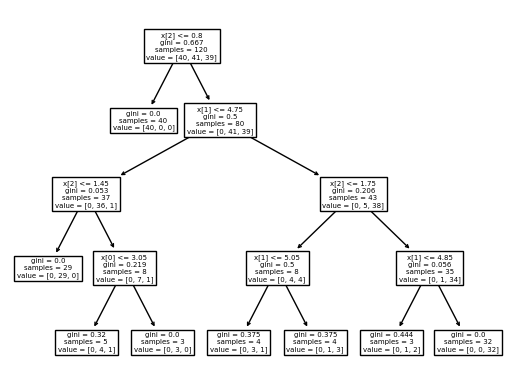

In [47]:
tree.plot_tree(iniindex)

entropy_deci

[Text(0.34615384615384615, 0.9, 'x[2] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2692307692307692, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4230769230769231, 0.7, 'x[1] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.5, 'x[2] <= 1.45\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.23076923076923078, 0.3, 'x[0] <= 3.05\nentropy = 0.544\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(0.15384615384615385, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3076923076923077, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.6923076923076923, 0.5, 'x[2] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.5384615384615384, 0.3, 'x[1] <= 5.05\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.46153846153846156, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3

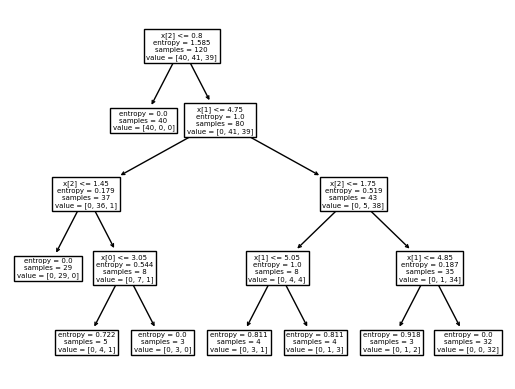

In [56]:
tree.plot_tree(entropy_deci)

data test_size = 0.8

In [57]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.8, random_state=42)

In [58]:
iniindex=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,random_state=100)

In [59]:
iniindex.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [60]:
y_pred=iniindex.predict(X_test)

In [61]:
confusion_matrix(Y_test,y_pred)

array([[43,  0,  0],
       [ 0, 34,  5],
       [ 0,  3, 35]])

In [62]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.87      0.89        39
           2       0.88      0.92      0.90        38

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



[Text(0.6, 0.8333333333333334, 'x[2] <= 1.55\ngini = 0.651\nsamples = 30\nvalue = [7, 11, 12]'),
 Text(0.4, 0.5, 'x[2] <= 0.7\ngini = 0.475\nsamples = 18\nvalue = [7, 11, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12]')]

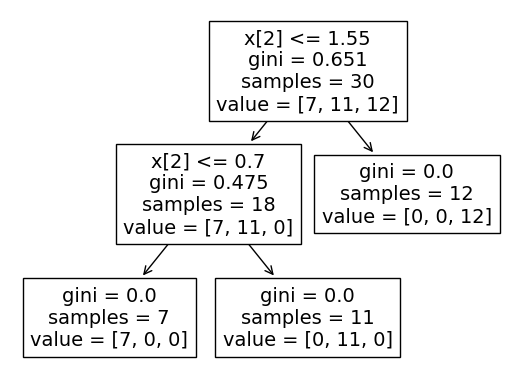

In [63]:
tree.plot_tree(iniindex)

In [64]:
entropy_deci=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=100)

In [65]:
entropy_deci.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [66]:
y_pred_entropy=entropy_deci.predict(X_test)

In [67]:
confusion_matrix(Y_test,y_pred_entropy)

array([[43,  0,  0],
       [ 0, 34,  5],
       [ 0,  3, 35]])

In [68]:
print(classification_report(Y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.87      0.89        39
           2       0.88      0.92      0.90        38

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



[Text(0.6, 0.8333333333333334, 'x[2] <= 1.55\nentropy = 1.549\nsamples = 30\nvalue = [7, 11, 12]'),
 Text(0.4, 0.5, 'x[2] <= 0.7\nentropy = 0.964\nsamples = 18\nvalue = [7, 11, 0]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12]')]

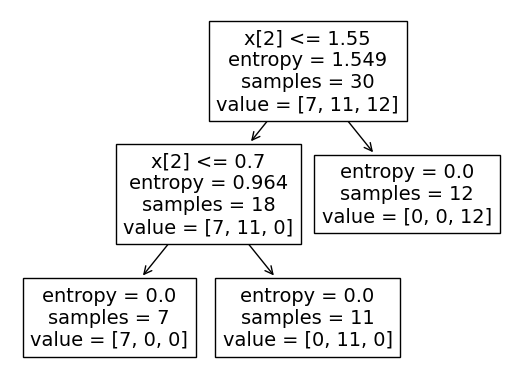

In [69]:
tree.plot_tree(entropy_deci)